## CMPE 188 Project 
<b>Team:</b> Team Alpha Super Awesome Cool Dynamite Wolf Squadron (TASACDWS)<br>
<b>Members:</b> Alam Figueroa, Kevin Gomez, Rachel Stanik<br>
<b>Description:</b> <br>
<b>Kaggle competition:</b> https://www.kaggle.com/c/ashrae-energy-prediction <br>

## Import python libraries

In [46]:
print (__doc__)

from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import svm
from sklearn.metrics import mean_squared_log_error
import eli5
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
import gc

# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt


# import matplotlib
# from matplotlib.pyplot import plot


Automatically created module for IPython interactive environment


## Import the datasets
### Datasets Descriptions
Referenced this kaggle notebook: https://www.kaggle.com/pednt9/ashrae-handling-missing-values/comments <br>
#### train.csv
* <b>Description:</b> contains the main training data for the model
* <b>Size:</b> 647.18 MB
* <b>Number of Records:</b> 20,216,102.
* <b>Features:</b> (building_id, meter, timestamp, meter_reading)

#### building_meta.csv
* <b>Description:</b> contains metadata about each building
* <b>Size:</b> 46KB
* <b>Number of Records:</b> 1148
* <b> 6 Features: </b> (site_id, building_id, primary_use, square_feet, year_built, floor_count)

#### weather_[train/test].csv
* <b>Description:</b> Weather data from a meteorological station as close as possible to the site.
* <b>Size:</b> 7.5MB /14.8MB respectively
* <b>Number of Records: </b>
* <b>9 Features: </b> (site_id, timestamp, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed

#### test.csv
* <b>Description:</b> The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data; it exists so you can get your predictions into the correct order.

#### sample_submission.csv
* <b>Description:</b> A valid sample submission.


In [2]:
building =      pd.read_csv('data/building_metadata.csv')
weather_train = pd.read_csv('data/weather_train.csv')
weather_test =  pd.read_csv('data/weather_test.csv')
train =         pd.read_csv('data/train.csv')
test =          pd.read_csv('data/test.csv')

In [3]:
test

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


In [4]:
building

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


### Merge Datasets

In [5]:
print('Merging train and test datasets with building dataset\n')
train = train.merge(building, on='building_id', how='left')
test =   test.merge(building, on='building_id', how='left')

print('Merging train and test datasets with weather dataset\n')
train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test,    on=['site_id', 'timestamp'], how='left')

print('Garbage collecting data to save memory \n')
del weather_train, weather_test, building
gc.collect()

Merging train and test datasets with building dataset

Merging train and test datasets with weather dataset

Garbage collecting data to save memory 



7

Export the merged datasets (for later)

In [6]:
train.head(20)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
5,5,0,2016-01-01 00:00:00,0.0,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
6,6,0,2016-01-01 00:00:00,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
7,7,0,2016-01-01 00:00:00,0.0,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
8,8,0,2016-01-01 00:00:00,0.0,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
9,9,0,2016-01-01 00:00:00,0.0,0,Office,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [7]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


In [8]:
train.count()

building_id           20216100
meter                 20216100
timestamp             20216100
meter_reading         20216100
site_id               20216100
primary_use           20216100
square_feet           20216100
year_built             8088455
floor_count            3506933
air_temperature       20119442
cloud_coverage        11390735
dew_temperature       20115960
precip_depth_1_hr     16467077
sea_level_pressure    18984431
wind_direction        18767052
wind_speed            20072424
dtype: int64

In [9]:
# count the number of null rows
train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

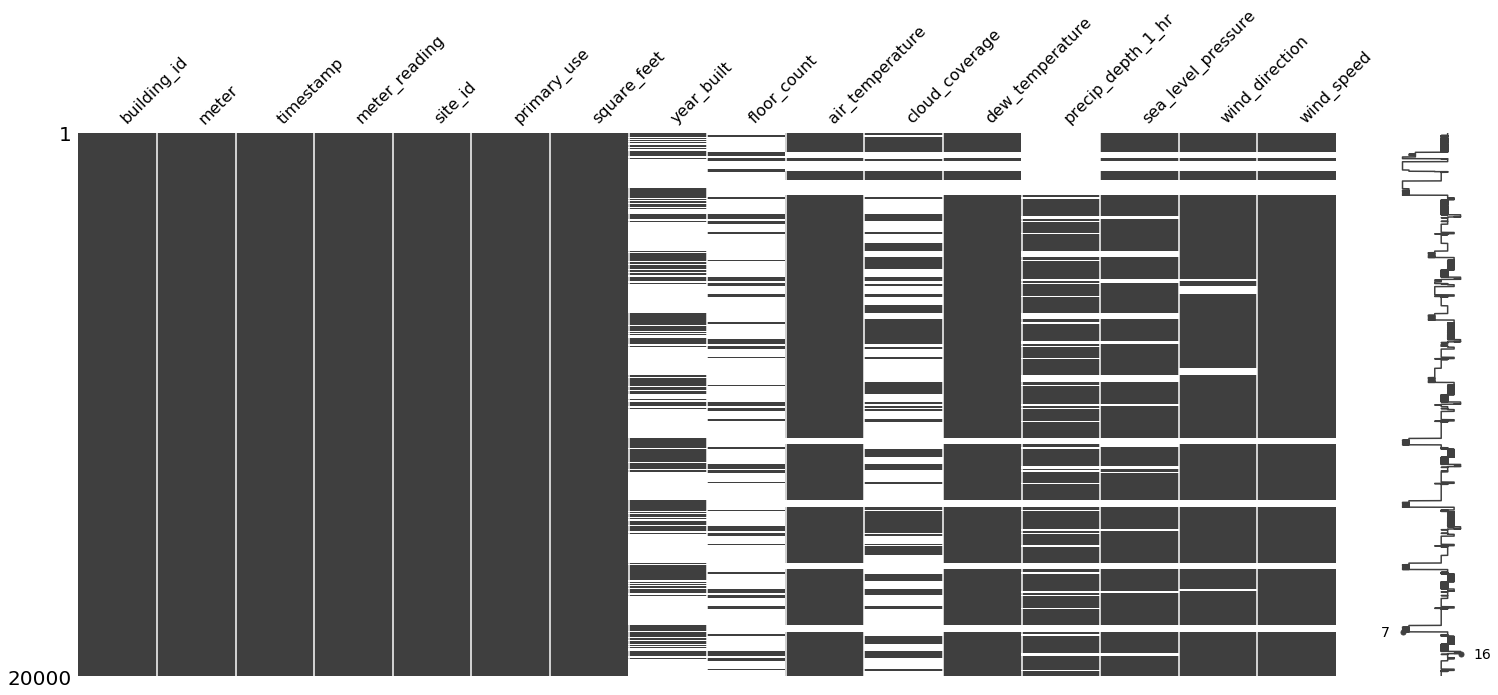

In [10]:
#visualize the missing data
msno.matrix(train.head(20000))

### Heat Map

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

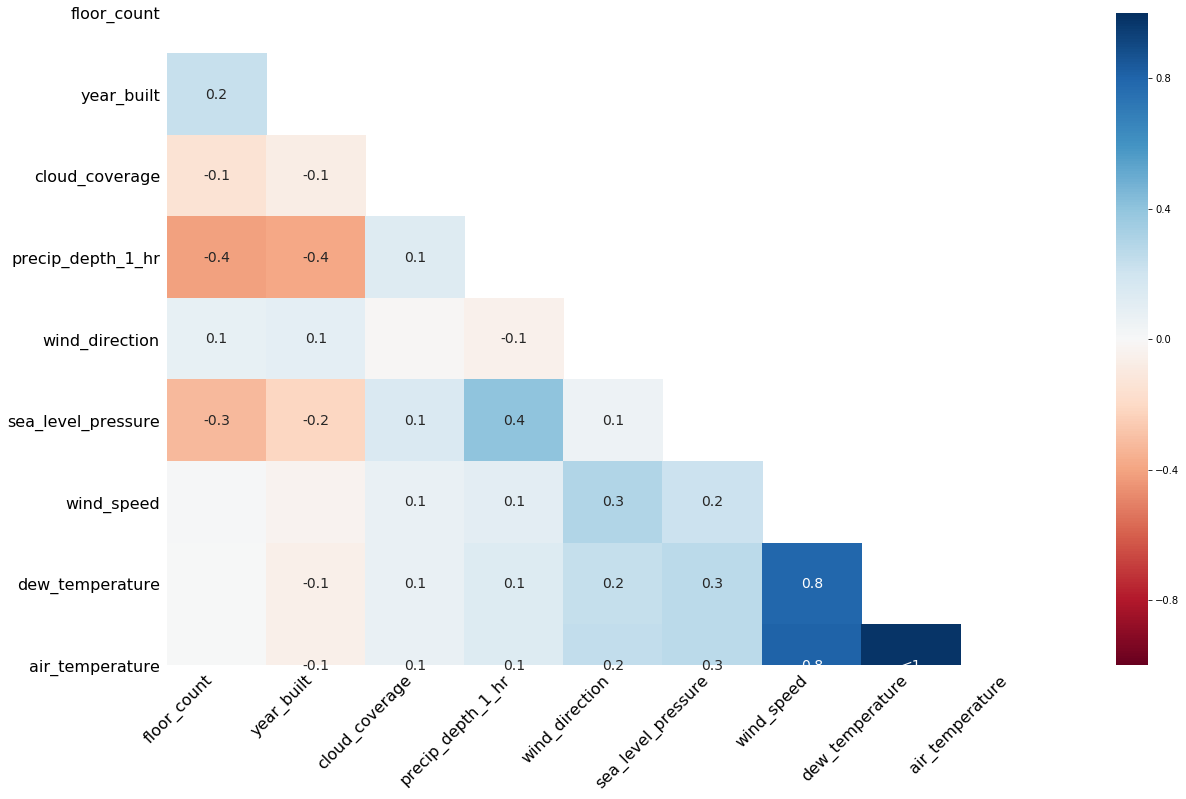

In [11]:
a = msno.heatmap(train, sort='ascending')

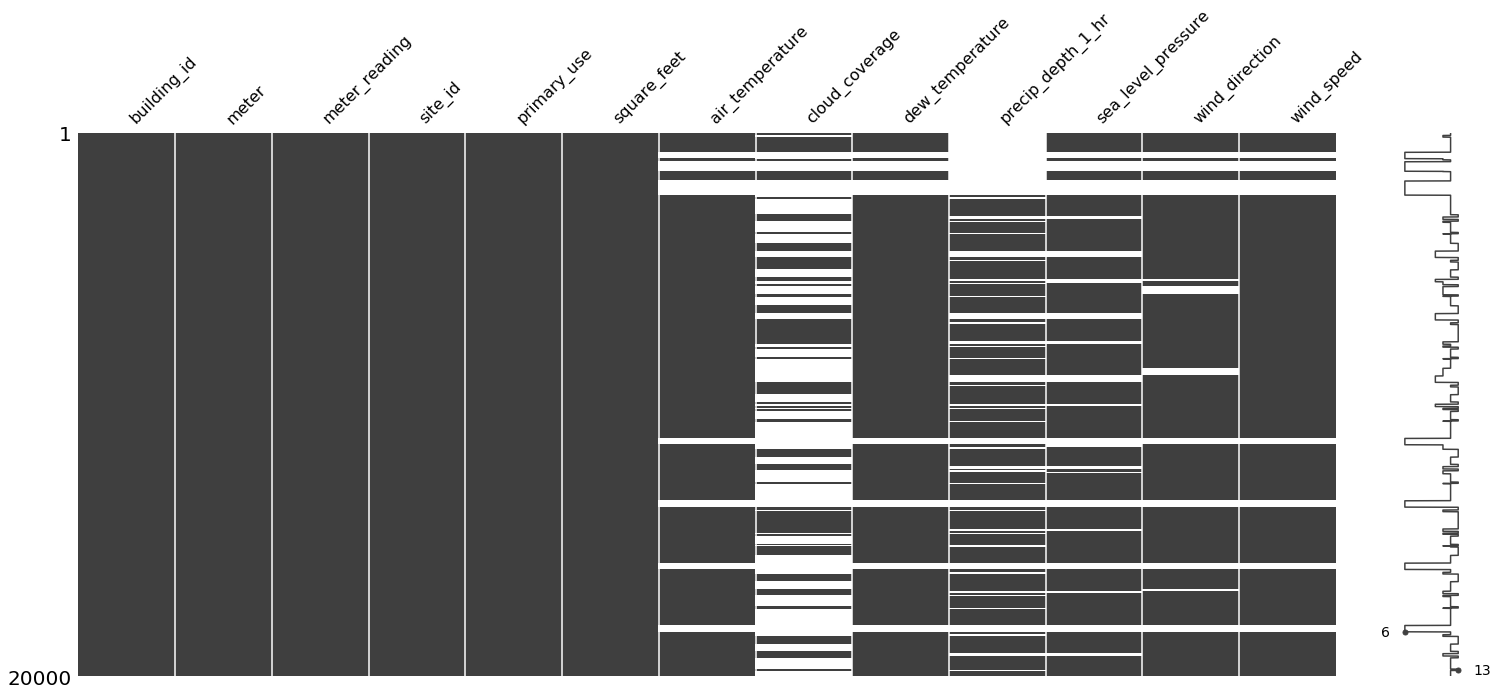

In [12]:
train2 = train.drop(columns=['year_built','floor_count','timestamp'])
test2 = test.drop(columns=['year_built','floor_count','timestamp'])
msno.matrix(train2.head(20000))

### Dendogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

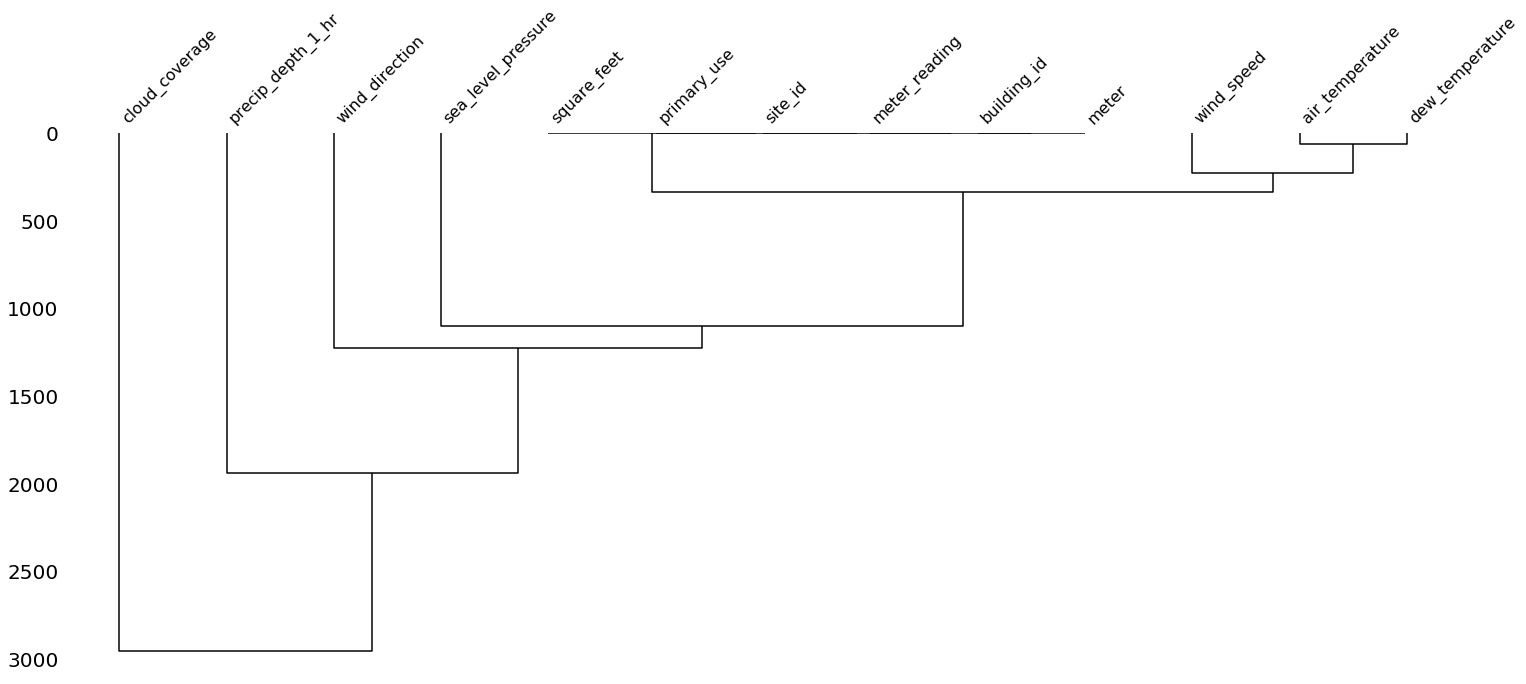

In [13]:
msno.dendrogram(train2)

In [14]:
train3 = pd.get_dummies(train2,prefix=['primary_use'])
test3 = pd.get_dummies(test2,prefix=['primary_use'])

In [15]:
train3.head(20)

,building_id,meter,meter_reading,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,0,0.0,0,7432,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,0,2720,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.0,0,5376,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0.0,0,23685,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.0,0,116607,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0.0,0,8000,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0.0,0,27926,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0.0,0,121074,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0.0,0,60809,25.0,6.0,20.0,NaN,1019.7,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0.0,0,27000,25.0,6.0,20.0,NaN,1019.7,...,1,0,0,0,0,0,0,0,0,0


In [16]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_train = pd.DataFrame(imp.fit_transform(train3))
imp_train.columns = train3.columns
imp_train.index = train3.index

imp_test = pd.DataFrame(imp.fit_transform(test3))
imp_test.columns = test3.columns
imp_test.index = test3.index

/Users/alamfigueroaaguilar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


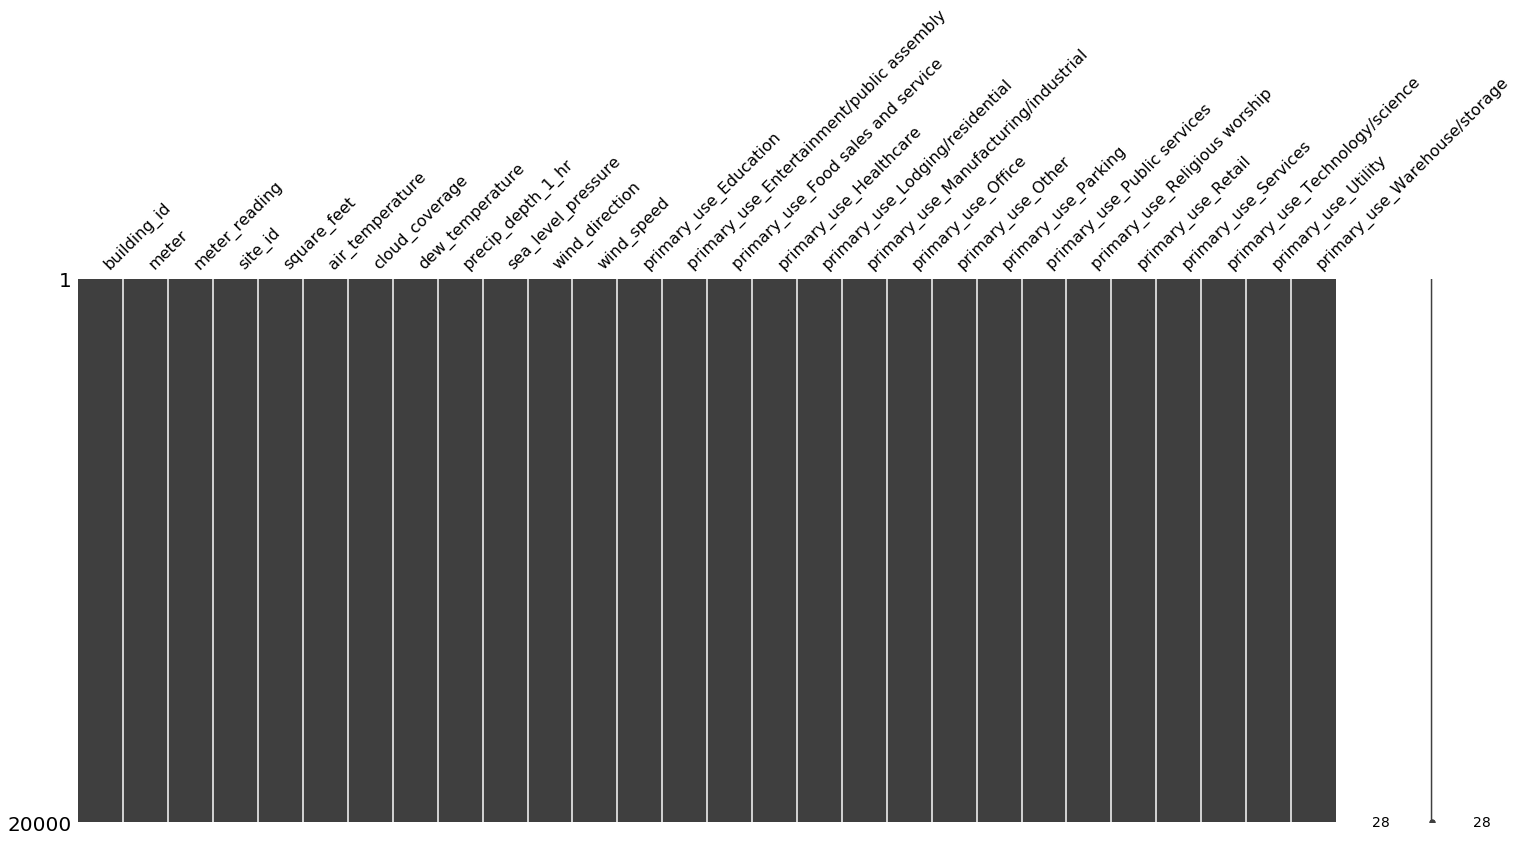

In [17]:
msno.matrix(imp_train.head(20000))

In [18]:
#create target class data
Y = imp_train.meter_reading
Y

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
20216095      8.750
20216096      4.825
20216097      0.000
20216098    159.575
20216099      2.850
Name: meter_reading, Length: 20216100, dtype: float64

In [19]:
#Remove target class from data
X = imp_train.drop(columns=['meter_reading'])
X 

,building_id,meter,site_id,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0.0,0.0,0.0,7432.0,25.0,6.000000,20.0,0.796416,1019.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,2720.0,25.0,6.000000,20.0,0.796416,1019.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,5376.0,25.0,6.000000,20.0,0.796416,1019.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,23685.0,25.0,6.000000,20.0,0.796416,1019.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,116607.0,25.0,6.000000,20.0,0.796416,1019.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444.0,0.0,15.0,19619.0,1.7,1.900423,-5.6,-1.000000,1008.5,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20216096,1445.0,0.0,15.0,4298.0,1.7,1.900423,-5.6,-1.000000,1008.5,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20216097,1446.0,0.0,15.0,11265.0,1.7,1.900423,-5.6,-1.000000,1008.5,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20216098,1447.0,0.0,15.0,29775.0,1.7,1.900423,-5.6,-1.000000,1008.5,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X,Y, test_size=0.2, random_state=0)

In [36]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

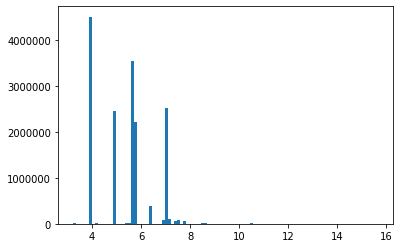

train_rmsle:  2.3462381722287384


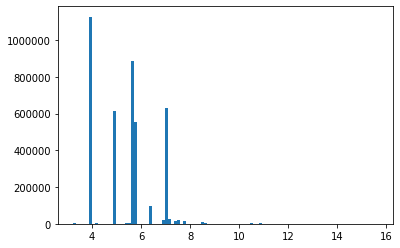

valid_rmsle:  2.343787224719472


In [45]:
def RMSLE(actual,preds):
    return np.sqrt(mean_squared_log_error(actual,preds))

def get_evaluations(regr_2):
    preds = regr_2.predict(X_train)
    plt.hist(np.log1p(preds),bins=100)
    plt.show();
    print('train_rmsle: ',RMSLE(y_train,abs(preds)))
                    
    preds = regr_2.predict(X_valid)
    plt.hist(np.log1p(preds),bins=100)
    plt.show()
    print('valid_rmsle: ',RMSLE(y_valid,abs(preds)))
    
get_evaluations(regr_2)

In [48]:
eli5.show_weights(regr_2,feature_names=list(X_train.columns))

Weight,Feature
0.3831,square_feet
0.3817,meter
0.1238,air_temperature
0.1112,dew_temperature
0.0002,building_id
0.0000,primary_use_Services
0.0000,primary_use_Education
0.0000,precip_depth_1_hr
0,cloud_coverage
0,sea_level_pressure


In [49]:
imp_test = imp_test.drop(columns=['building_id'])

In [50]:
y_1 = regr_1.predict(imp_test)
y_2 = regr_2.predict(imp_test)

ValueError: Number of features of the model must match the input. Model n_features is 27 and input n_features is 26 

In [30]:
y_1

array([357.17476326, 357.17476326, 357.17476326, ..., 357.17476326,
       357.17476326, 357.17476326])

In [31]:
df = pd.DataFrame(index = imp_test.building_id,data = {'meter_reading':list(y_1)})
df

,meter_reading
building_id,
0.0,357.174763
1.0,357.174763
2.0,357.174763
3.0,357.174763
4.0,357.174763
...,...
1444.0,357.174763
1445.0,357.174763
1446.0,357.174763


In [32]:
df.to_csv('df_tree.csv')